# Fuji Baseline

In [4]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Load Data
dataset = pd.read_csv("../Apple462.csv")
dataset

# Split data from region and drop the unused data
netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Gala'], axis=1, inplace=True)


netherlands_dataset # Show dataframe

C:\Users\maiwi\AppData\Local\Temp\ipykernel_23464\4266501386.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Gala'], axis=1, inplace=True)


,Date,Fuji,region
884,27/12/2015,288004.0,Netherland
885,20/12/2015,278067.0,Netherland
886,13/12/2015,386865.0,Netherland
887,6/12/2015,490805.0,Netherland
888,29/11/2015,289534.0,Netherland
...,...,...,...
3508,4/2/2018,300383.0,Netherland
3509,28/1/2018,103716.0,Netherland
3510,21/1/2018,153445.0,Netherland
3511,14/1/2018,292562.0,Netherland


In [5]:
netherlands_dataset.count() # see df count to check misvalue

Date      169
Fuji      164
region    169
dtype: int64

## Fill the average value to misvalue in dataframe

In [6]:
# average Fuji
avg_Fuji = math.ceil(netherlands_dataset['Fuji'].sum() / len(netherlands_dataset['Fuji']))

print(f"Average Fuji: {avg_Fuji}")

# add avg in miss value
netherlands_dataset['Fuji'].fillna(avg_Fuji, inplace=True)

netherlands_dataset.count()

Average Fuji: 273931


C:\Users\maiwi\AppData\Local\Temp\ipykernel_23464\4044880444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Fuji'].fillna(avg_Fuji, inplace=True)


Date      169
Fuji      169
region    169
dtype: int64

In [7]:
netherlands_dataset

,Date,Fuji,region
884,27/12/2015,288004.0,Netherland
885,20/12/2015,278067.0,Netherland
886,13/12/2015,386865.0,Netherland
887,6/12/2015,490805.0,Netherland
888,29/11/2015,289534.0,Netherland
...,...,...,...
3508,4/2/2018,300383.0,Netherland
3509,28/1/2018,103716.0,Netherland
3510,21/1/2018,153445.0,Netherland
3511,14/1/2018,292562.0,Netherland


## Graph 

Show the graph after sorted by 'Date'

In [8]:
netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
netherlands_dataset = netherlands_dataset.sort_values(by='Date') # sort by date

df = netherlands_dataset.set_index('Date') # set 'Date' to id because it unique

C:\Users\maiwi\AppData\Local\Temp\ipykernel_23464\2997772964.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
C:\Users\maiwi\AppData\Local\Temp\ipykernel_23464\2997772964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function


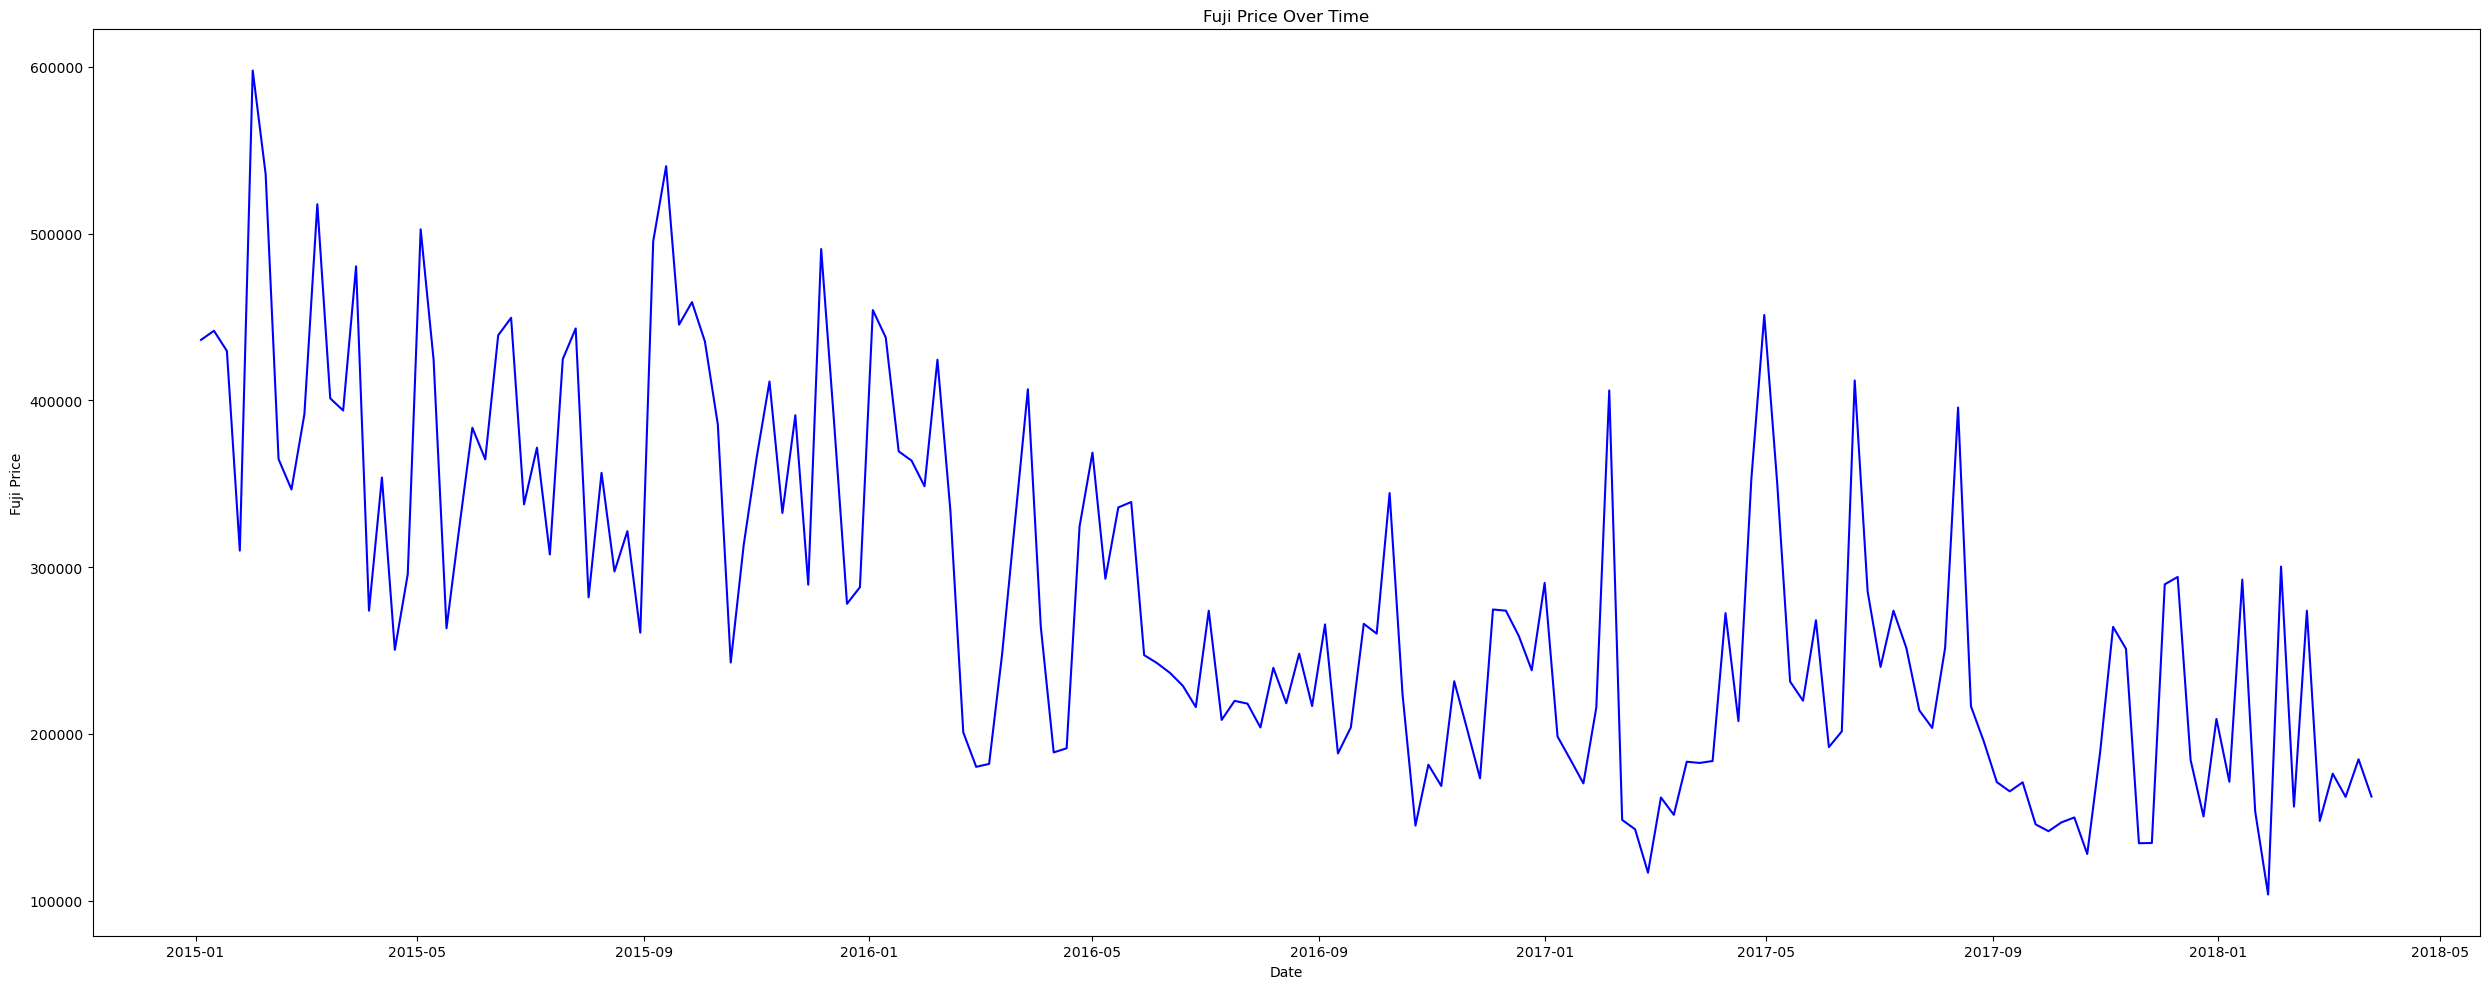

In [9]:
# graph size
plt.figure(figsize=(25, 10))
plt.plot(df.index, df['Fuji'], color='b')

plt.xlabel('Date')

plt.ylabel('Fuji Price')
# plt.yscale('log') # set log scale

plt.title('Fuji Price Over Time')
# plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()

plt.show()

In [10]:
df['Fuji_x1'] = df['Fuji'].shift(-1, fill_value=0)
df['Fuji_x2'] = df['Fuji'].shift(-2, fill_value=0)
df['Fuji_x3'] = df['Fuji'].shift(-3, fill_value=0)


# df['Fuji_pred'] =  (df['Fuji'].shift(-1) + df['Fuji'].shift(-2) + df['Fuji'])  / 3

df.drop(df.tail(3).index, inplace=True)

df.drop(['region'], axis=1, inplace=True)

df

,Fuji,Fuji_x1,Fuji_x2,Fuji_x3
Date,,,,
2015-01-04,436348.0,441786.0,429687.0,309975.0
2015-01-11,441786.0,429687.0,309975.0,597856.0
2015-01-18,429687.0,309975.0,597856.0,535769.0
2015-01-25,309975.0,597856.0,535769.0,364818.0
2015-02-01,597856.0,535769.0,364818.0,346618.0
...,...,...,...,...
2018-02-04,300383.0,156459.0,273931.0,147837.0
2018-02-11,156459.0,273931.0,147837.0,176207.0
2018-02-18,273931.0,147837.0,176207.0,162270.0


## Set seed_value 

In [11]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

In [12]:
# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


X = df.drop(['Fuji'], axis=1)
y = df['Fuji']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


y_pred =  (y_test.shift(-1) + y_test.shift(-2) + y_test.shift(-3))  / 3


y_pred.fillna(avg_Fuji, inplace=True)


# Show performance
MSE = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, y_pred)
print(f'R2 Score: {MAE}')

Mean Squared Error: 13542920808.195557
Mean Absolute Error: 89391.17333333334
R2 Score: 89391.17333333334


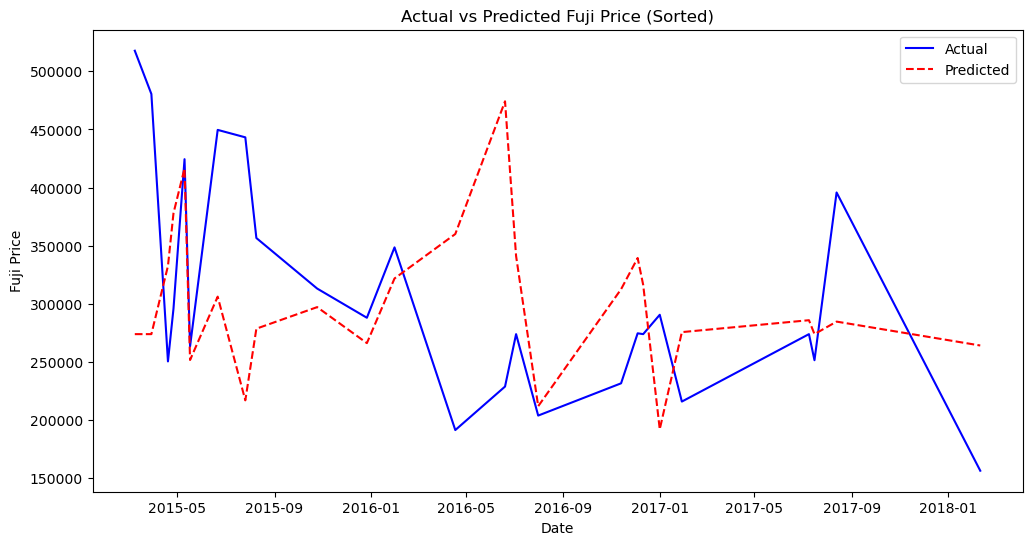

In [13]:
sorted_index = y_test.index.argsort()
y_test_sorted = y_test.iloc[sorted_index]
y_pred_sorted = y_pred.iloc[sorted_index]

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual', color='blue')
plt.plot(y_test_sorted.index, y_pred_sorted, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Fuji Price')
plt.title('Actual vs Predicted Fuji Price (Sorted)')
plt.legend()
plt.show()
